In [1]:
import matplotlib.pyplot as plt 
import pickle 
import cv2 
import numpy as np 
from sklearn.model_selection import train_test_split
import tensorflow as tf 
import os 
from tqdm import tqdm

In [2]:
def create_dataset(img_folder):
    img_data_array=[]
    img_name=[]
    for dir1 in tqdm(os.listdir(img_folder)):
        image_path = os.path.join(img_folder, dir1)
        try:
            image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            image= cv2.resize(image,(300,300))
            image= np.array(image)
            image= image.astype('float32')
            image /= 255.0 
            img_data_array.append(image)
        except:
            print('예외 발생')
    return np.array(img_data_array)

In [3]:
def plot_rgb_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [4]:
name = 'azuki' #boredapeyachtclub, cool-cats-nft, doodles-official, meebits

In [5]:
image_df = create_dataset('./'+name)

 76%|████████████████████████████▎        | 7637/10001 [00:27<00:08, 274.49it/s]

예외 발생


100%|████████████████████████████████████| 10001/10001 [00:36<00:00, 273.08it/s]


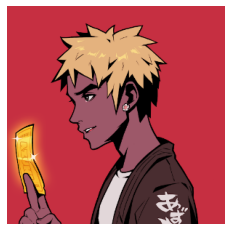

In [6]:
plot_rgb_img(image_df[0])

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Conv2D, UpSampling2D, BatchNormalization, Flatten, Cropping2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [8]:
def create_model():
    x = Input(shape=(300, 300, 3)) 

    # Encoder
    e_conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    pool1 = MaxPooling2D((2, 2), padding='same')(e_conv1)
    batchnorm_1 = BatchNormalization()(pool1)
    e_conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(batchnorm_1)
    pool2 = MaxPooling2D((2, 2), padding='same')(e_conv2)
    batchnorm_2 = BatchNormalization()(pool2)
    e_conv3 = Conv2D(16, (3, 3), activation='relu', padding='same')(batchnorm_2)
    h = MaxPooling2D((2, 2), padding='same')(e_conv3)


    # Decoder
    d_conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(h)
    up1 = UpSampling2D((2, 2))(d_conv1)
    d_conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
    up2 = UpSampling2D((2, 2))(d_conv2)
    d_conv3 = Conv2D(16, (3, 3), activation='relu')(up2)
    up3 = UpSampling2D((2, 2))(d_conv3)
    r = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up3)

    model = Model(x, r)
    model.compile(optimizer='adam', loss='mse')
    return model

In [12]:
gaussian_auto_encoder = create_model()
gaussian_early_stop = EarlyStopping(monitor='loss', patience=10)
gaussian_history = gaussian_auto_encoder.fit(image_df, image_df, 
                                             epochs=50, 
                                             batch_size=64, 
                                             callbacks=[gaussian_early_stop])

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
plt.plot(gaussian_history.epoch, gaussian_history.history['loss'])
plt.title('Epochs on Training Loss')
plt.xlabel('# of Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [10]:
input_img = keras.Input(shape=(300, 300, 3))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Metal device set to: Apple M1 Pro


2022-09-19 22:54:59.685162: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-19 22:54:59.685291: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 8)       1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 8)         584   

In [12]:
autoencoder.fit(image_df, image_df,
                epochs=50,
                batch_size=128,
                shuffle=True,
                #validation_data=(x_test, x_test),
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')]
               )

2022-09-19 22:56:45.734295: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


ValueError: in user code:

    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/engine/input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "model" expects 1 input(s), but it received 10000 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:10' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:11' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:12' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:13' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:14' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:15' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:16' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:17' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:18' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:19' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:20' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:21' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:22' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:23' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:24' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:25' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:26' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:27' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:28' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:29' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:30' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:31' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:32' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:33' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:34' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:35' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:36' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:37' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:38' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:39' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:40' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:41' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:42' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:43' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:44' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:45' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:46' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:47' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:48' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:49' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:50' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:51' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:52' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:53' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:54' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:55' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:56' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:57' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:58' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:59' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:60' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:61' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:62' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:63' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:64' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:65' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:66' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:67' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:68' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:69' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:70' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:71' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:72' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:73' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:74' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:75' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:76' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:77' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:78' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:79' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:80' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:81' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:82' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:83' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:84' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:85' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:86' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:87' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:88' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:89' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:90' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:91' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:92' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:93' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:94' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:95' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:96' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:97' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:98' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:99' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9999' shape=(None, 300, 3) dtype=float32>]


In [14]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(image_df)

ValueError: in user code:

    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/engine/input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "model_2" expects 1 input(s), but it received 10000 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:10' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:11' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:12' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:13' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:14' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:15' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:16' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:17' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:18' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:19' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:20' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:21' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:22' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:23' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:24' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:25' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:26' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:27' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:28' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:29' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:30' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:31' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:32' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:33' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:34' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:35' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:36' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:37' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:38' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:39' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:40' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:41' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:42' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:43' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:44' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:45' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:46' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:47' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:48' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:49' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:50' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:51' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:52' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:53' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:54' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:55' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:56' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:57' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:58' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:59' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:60' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:61' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:62' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:63' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:64' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:65' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:66' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:67' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:68' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:69' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:70' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:71' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:72' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:73' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:74' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:75' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:76' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:77' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:78' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:79' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:80' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:81' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:82' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:83' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:84' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:85' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:86' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:87' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:88' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:89' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:90' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:91' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:92' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:93' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:94' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:95' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:96' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:97' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:98' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:99' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8999' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9000' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9001' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9002' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9003' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9004' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9005' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9006' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9007' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9008' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9009' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9010' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9011' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9012' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9013' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9014' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9015' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9016' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9017' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9018' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9019' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9020' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9021' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9022' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9023' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9024' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9025' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9026' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9027' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9028' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9029' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9030' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9031' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9032' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9033' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9034' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9035' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9036' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9037' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9038' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9039' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9040' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9041' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9042' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9043' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9044' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9045' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9046' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9047' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9048' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9049' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9050' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9051' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9052' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9053' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9054' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9055' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9056' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9057' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9058' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9059' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9060' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9061' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9062' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9063' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9064' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9065' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9066' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9067' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9068' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9069' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9070' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9071' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9072' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9073' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9074' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9075' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9076' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9077' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9078' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9079' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9080' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9081' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9082' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9083' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9084' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9085' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9086' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9087' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9088' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9089' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9090' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9091' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9092' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9093' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9094' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9095' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9096' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9097' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9098' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9099' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9100' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9101' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9102' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9103' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9104' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9105' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9106' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9107' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9108' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9109' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9110' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9111' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9112' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9113' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9114' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9115' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9116' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9117' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9118' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9119' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9120' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9121' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9122' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9123' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9124' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9125' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9126' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9127' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9128' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9129' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9130' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9131' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9132' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9133' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9134' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9135' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9136' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9137' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9138' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9139' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9140' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9141' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9142' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9143' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9144' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9145' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9146' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9147' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9148' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9149' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9150' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9151' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9152' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9153' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9154' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9155' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9156' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9157' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9158' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9159' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9160' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9161' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9162' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9163' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9164' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9165' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9166' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9167' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9168' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9169' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9170' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9171' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9172' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9173' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9174' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9175' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9176' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9177' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9178' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9179' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9180' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9181' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9182' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9183' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9184' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9185' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9186' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9187' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9188' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9189' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9190' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9191' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9192' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9193' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9194' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9195' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9196' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9197' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9198' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9199' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9200' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9201' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9202' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9203' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9204' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9205' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9206' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9207' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9208' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9209' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9210' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9211' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9212' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9213' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9214' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9215' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9216' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9217' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9218' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9219' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9220' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9221' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9222' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9223' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9224' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9225' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9226' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9227' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9228' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9229' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9230' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9231' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9232' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9233' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9234' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9235' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9236' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9237' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9238' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9239' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9240' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9241' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9242' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9243' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9244' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9245' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9246' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9247' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9248' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9249' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9250' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9251' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9252' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9253' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9254' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9255' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9256' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9257' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9258' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9259' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9260' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9261' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9262' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9263' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9264' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9265' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9266' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9267' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9268' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9269' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9270' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9271' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9272' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9273' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9274' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9275' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9276' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9277' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9278' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9279' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9280' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9281' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9282' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9283' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9284' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9285' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9286' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9287' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9288' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9289' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9290' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9291' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9292' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9293' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9294' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9295' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9296' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9297' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9298' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9299' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9300' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9301' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9302' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9303' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9304' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9305' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9306' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9307' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9308' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9309' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9310' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9311' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9312' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9313' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9314' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9315' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9316' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9317' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9318' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9319' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9320' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9321' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9322' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9323' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9324' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9325' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9326' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9327' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9328' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9329' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9330' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9331' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9332' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9333' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9334' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9335' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9336' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9337' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9338' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9339' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9340' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9341' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9342' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9343' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9344' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9345' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9346' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9347' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9348' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9349' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9350' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9351' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9352' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9353' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9354' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9355' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9356' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9357' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9358' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9359' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9360' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9361' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9362' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9363' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9364' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9365' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9366' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9367' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9368' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9369' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9370' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9371' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9372' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9373' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9374' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9375' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9376' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9377' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9378' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9379' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9380' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9381' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9382' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9383' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9384' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9385' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9386' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9387' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9388' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9389' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9390' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9391' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9392' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9393' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9394' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9395' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9396' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9397' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9398' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9399' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9400' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9401' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9402' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9403' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9404' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9405' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9406' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9407' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9408' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9409' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9410' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9411' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9412' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9413' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9414' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9415' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9416' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9417' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9418' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9419' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9420' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9421' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9422' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9423' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9424' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9425' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9426' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9427' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9428' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9429' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9430' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9431' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9432' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9433' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9434' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9435' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9436' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9437' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9438' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9439' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9440' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9441' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9442' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9443' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9444' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9445' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9446' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9447' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9448' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9449' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9450' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9451' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9452' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9453' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9454' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9455' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9456' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9457' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9458' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9459' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9460' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9461' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9462' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9463' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9464' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9465' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9466' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9467' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9468' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9469' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9470' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9471' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9472' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9473' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9474' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9475' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9476' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9477' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9478' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9479' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9480' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9481' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9482' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9483' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9484' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9485' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9486' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9487' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9488' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9489' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9490' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9491' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9492' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9493' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9494' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9495' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9496' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9497' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9498' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9499' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9500' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9501' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9502' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9503' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9504' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9505' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9506' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9507' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9508' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9509' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9510' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9511' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9512' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9513' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9514' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9515' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9516' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9517' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9518' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9519' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9520' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9521' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9522' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9523' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9524' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9525' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9526' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9527' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9528' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9529' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9530' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9531' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9532' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9533' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9534' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9535' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9536' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9537' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9538' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9539' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9540' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9541' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9542' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9543' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9544' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9545' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9546' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9547' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9548' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9549' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9550' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9551' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9552' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9553' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9554' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9555' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9556' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9557' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9558' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9559' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9560' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9561' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9562' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9563' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9564' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9565' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9566' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9567' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9568' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9569' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9570' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9571' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9572' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9573' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9574' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9575' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9576' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9577' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9578' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9579' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9580' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9581' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9582' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9583' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9584' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9585' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9586' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9587' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9588' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9589' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9590' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9591' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9592' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9593' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9594' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9595' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9596' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9597' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9598' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9599' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9600' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9601' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9602' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9603' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9604' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9605' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9606' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9607' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9608' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9609' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9610' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9611' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9612' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9613' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9614' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9615' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9616' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9617' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9618' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9619' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9620' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9621' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9622' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9623' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9624' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9625' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9626' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9627' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9628' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9629' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9630' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9631' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9632' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9633' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9634' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9635' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9636' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9637' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9638' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9639' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9640' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9641' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9642' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9643' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9644' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9645' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9646' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9647' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9648' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9649' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9650' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9651' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9652' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9653' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9654' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9655' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9656' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9657' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9658' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9659' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9660' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9661' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9662' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9663' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9664' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9665' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9666' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9667' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9668' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9669' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9670' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9671' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9672' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9673' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9674' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9675' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9676' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9677' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9678' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9679' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9680' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9681' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9682' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9683' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9684' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9685' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9686' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9687' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9688' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9689' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9690' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9691' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9692' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9693' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9694' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9695' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9696' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9697' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9698' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9699' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9700' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9701' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9702' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9703' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9704' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9705' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9706' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9707' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9708' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9709' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9710' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9711' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9712' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9713' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9714' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9715' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9716' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9717' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9718' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9719' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9720' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9721' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9722' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9723' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9724' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9725' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9726' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9727' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9728' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9729' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9730' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9731' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9732' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9733' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9734' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9735' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9736' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9737' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9738' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9739' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9740' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9741' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9742' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9743' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9744' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9745' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9746' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9747' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9748' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9749' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9750' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9751' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9752' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9753' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9754' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9755' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9756' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9757' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9758' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9759' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9760' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9761' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9762' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9763' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9764' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9765' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9766' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9767' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9768' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9769' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9770' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9771' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9772' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9773' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9774' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9775' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9776' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9777' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9778' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9779' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9780' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9781' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9782' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9783' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9784' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9785' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9786' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9787' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9788' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9789' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9790' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9791' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9792' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9793' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9794' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9795' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9796' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9797' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9798' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9799' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9800' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9801' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9802' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9803' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9804' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9805' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9806' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9807' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9808' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9809' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9810' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9811' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9812' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9813' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9814' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9815' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9816' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9817' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9818' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9819' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9820' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9821' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9822' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9823' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9824' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9825' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9826' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9827' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9828' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9829' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9830' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9831' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9832' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9833' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9834' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9835' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9836' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9837' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9838' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9839' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9840' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9841' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9842' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9843' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9844' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9845' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9846' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9847' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9848' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9849' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9850' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9851' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9852' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9853' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9854' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9855' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9856' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9857' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9858' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9859' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9860' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9861' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9862' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9863' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9864' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9865' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9866' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9867' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9868' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9869' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9870' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9871' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9872' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9873' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9874' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9875' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9876' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9877' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9878' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9879' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9880' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9881' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9882' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9883' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9884' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9885' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9886' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9887' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9888' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9889' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9890' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9891' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9892' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9893' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9894' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9895' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9896' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9897' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9898' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9899' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9900' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9901' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9902' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9903' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9904' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9905' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9906' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9907' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9908' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9909' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9910' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9911' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9912' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9913' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9914' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9915' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9916' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9917' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9918' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9919' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9920' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9921' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9922' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9923' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9924' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9925' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9926' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9927' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9928' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9929' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9930' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9931' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9932' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9933' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9934' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9935' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9936' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9937' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9938' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9939' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9940' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9941' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9942' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9943' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9944' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9945' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9946' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9947' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9948' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9949' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9950' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9951' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9952' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9953' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9954' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9955' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9956' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9957' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9958' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9959' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9960' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9961' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9962' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9963' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9964' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9965' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9966' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9967' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9968' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9969' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9970' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9971' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9972' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9973' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9974' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9975' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9976' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9977' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9978' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9979' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9980' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9981' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9982' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9983' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9984' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9985' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9986' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9987' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9988' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9989' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9990' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9991' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9992' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9993' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9994' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9995' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9996' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9997' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9998' shape=(None, 300, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9999' shape=(None, 300, 3) dtype=float32>]


In [15]:
encoded_imgs

NameError: name 'encoded_imgs' is not defined

In [125]:
def encoder():
    x = Input(shape=image_df[0].shape) 

    e_conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    pool1 = MaxPooling2D((3, 3), padding='same')(e_conv1)
    e_conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D((3, 3), padding='same')(e_conv2)
    e_conv3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
    h = MaxPooling2D((3, 3), padding='same', name ='encoder_output')(e_conv3)
    
    model = Model(x,h)
    model.compile(optimizer='adam', loss='mse')
    
    return model

In [126]:
encoder = encoder()
encoder.summary()

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 512, 512, 3)]     0         
                                                                 
 conv2d_113 (Conv2D)         (None, 512, 512, 64)      1792      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 171, 171, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_114 (Conv2D)         (None, 171, 171, 32)      18464     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 57, 57, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_115 (Conv2D)         (None, 57, 57, 8)         231

In [129]:
def decoder():
    h = Input(shape=encoder.get_layer('encoder_output').output_shape[1:])
    
    d_conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(h)
    up1 = UpSampling2D((3, 3))(d_conv1)
    #up1 = Cropping2D(cropping=((1, 1), (1, 1)))(up1)
    d_conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
    up2 = UpSampling2D((3, 3))(d_conv2)
    d_conv3 = Conv2D(64, (3, 3), activation='relu')(up2)
    up3 = UpSampling2D((3, 3))(d_conv3)
    r = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up3)
    
    model = Model(h, r)
    model.compile(optimizer='adam', loss='mse')
    return model

In [130]:
decoder = decoder()
decoder.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 19, 19, 8)]       0         
                                                                 
 conv2d_120 (Conv2D)         (None, 19, 19, 16)        1168      
                                                                 
 up_sampling2d_57 (UpSamplin  (None, 57, 57, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_121 (Conv2D)         (None, 57, 57, 32)        4640      
                                                                 
 up_sampling2d_58 (UpSamplin  (None, 171, 171, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_122 (Conv2D)         (None, 169, 169, 64)      184

In [105]:
ae_input = Input(shape=image_df[0].shape) 
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)
total = Model(ae_input, ae_decoder_output)
total.compile(optimizer='adam',loss='mse')

In [106]:
total.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 300, 300, 3)]     0         
                                                                 
 model_9 (Functional)        (None, 12, 12, 8)         22568     
                                                                 
 model_26 (Functional)       (None, 300, 300, 3)       26035     
                                                                 
Total params: 48,603
Trainable params: 48,603
Non-trainable params: 0
_________________________________________________________________


In [108]:
early_stop = EarlyStopping(monitor='loss', patience=3)
total_history = total.fit(image_df, image_df, 
                         epochs=50, 
                         batch_size=256, 
                         callbacks=[early_stop])

IndexError: tuple index out of range

In [ ]:
def create_model():
    x = Input(shape=(300, 300, 3)) 

    # Encoder
    e_conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    pool1 = MaxPooling2D((2, 2), padding='same')(e_conv1)
    batchnorm_1 = BatchNormalization()(pool1)
    e_conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(batchnorm_1)
    pool2 = MaxPooling2D((2, 2), padding='same')(e_conv2)
    batchnorm_2 = BatchNormalization()(pool2)
    e_conv3 = Conv2D(16, (3, 3), activation='relu', padding='same')(batchnorm_2)
    h = MaxPooling2D((2, 2), padding='same')(e_conv3)


    # Decoder
    d_conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(h)
    up1 = UpSampling2D((2, 2))(d_conv1)
    d_conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
    up2 = UpSampling2D((2, 2))(d_conv2)
    d_conv3 = Conv2D(16, (3, 3), activation='relu')(up2)
    up3 = UpSampling2D((2, 2))(d_conv3)
    r = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up3)

    model = Model(x, r)
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
gaussian_auto_encoder = create_model()
gaussian_early_stop = EarlyStopping(monitor='loss', patience=3)
gaussian_history = gaussian_auto_encoder.fit(gaussian_train_data, train_data, epochs=50, batch_size=32, callbacks=[gaussian_early_stop])

In [ ]:
plt.plot(gaussian_history.epoch, gaussian_history.history['loss'])
plt.title('Epochs on Training Loss')
plt.xlabel('# of Epochs')
plt.ylabel('Mean Squared Error')
plt.show()